## Data visualization and Application of K-Means algorithm for Hololens Data 

In [31]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Pour faire des graphiques 3D
import pandas as pd

Importing the Data generatede by the Parsing notebook

First let's take a look at the data generated by player 8 (the player that has more data available, about 300 seconds of game)

In [82]:
X = np.genfromtxt('./features/features_p8_1.csv', delimiter=',')
y = np.genfromtxt('./features/output_p8_1.csv', delimiter=',')

In [83]:
pd.DataFrame(X).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.709158,-0.023145,0.051482,0.168752,0.052231,-0.112302,-0.079082,-0.084211,-0.131189,0.075526,0.150582,0.150582,0.265384,-0.160215,0.041714,0.051482,0.153457,0.224937
1,0.709158,1.000000,0.031332,0.115430,0.196575,0.023545,-0.107663,-0.048950,-0.118766,-0.128091,0.095238,0.060459,0.060459,0.261756,-0.169774,0.012326,0.115430,0.074287,0.153844
2,-0.023145,0.031332,1.000000,-0.195397,0.532688,-0.226095,0.025641,0.145129,-0.117018,0.017095,0.048422,0.097459,0.097459,0.118060,-0.295436,-0.105117,-0.195397,-0.047764,-0.102179
3,0.051482,0.115430,-0.195397,1.000000,0.306920,0.068107,0.052945,-0.063821,0.007121,-0.016445,0.077710,-0.003502,-0.003502,0.060523,-0.000441,0.057738,1.000000,-0.085698,-0.054598
4,0.168752,0.196575,0.532688,0.306920,1.000000,-0.351391,-0.022057,0.007924,-0.146288,-0.034605,0.169975,0.008839,0.008839,0.498556,-0.844080,-0.032985,0.306920,0.054423,0.038221
5,0.052231,0.023545,-0.226095,0.068107,-0.351391,1.000000,0.068575,-0.166349,-0.007416,-0.174677,0.052274,-0.070530,-0.070530,-0.246303,0.631900,0.646029,0.068107,-0.256379,-0.105993
6,-0.112302,-0.107663,0.025641,0.052945,-0.022057,0.068575,1.000000,0.129230,0.015195,0.028561,-0.081121,0.035182,0.035182,-0.051628,0.072778,0.144562,0.052945,-0.027778,-0.048201
7,-0.079082,-0.048950,0.145129,-0.063821,0.007924,-0.166349,0.129230,1.000000,-0.086881,0.004838,-0.115149,-0.097811,-0.097811,0.387708,-0.027262,-0.075085,-0.063821,0.048423,0.053160
8,-0.084211,-0.118766,-0.117018,0.007121,-0.146288,-0.007416,0.015195,-0.086881,1.000000,0.031344,-0.087345,0.081060,0.081060,-0.191491,0.107094,0.186958,0.007121,-0.065576,0.055098
9,-0.131189,-0.128091,0.017095,-0.016445,-0.034605,-0.174677,0.028561,0.004838,0.031344,1.000000,-0.126368,0.129300,0.129300,-0.103066,-0.020908,-0.104174,-0.016445,0.035785,0.026204


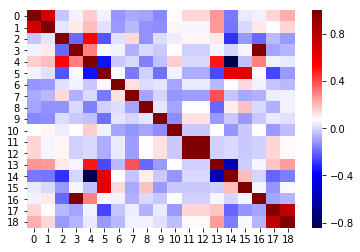

In [84]:
import seaborn as sns
sns_plot = sns.heatmap(pd.DataFrame(X).corr(), cmap='seismic')
figure = sns_plot.get_figure()    
figure.savefig('correlation_p8_t1.png', dpi=400)


4 and 14 are very correlated features (angular_speed_avg and velocity_avg), what is actually expected, given that the motion is mostly angular (rotation of the head instead of translation)

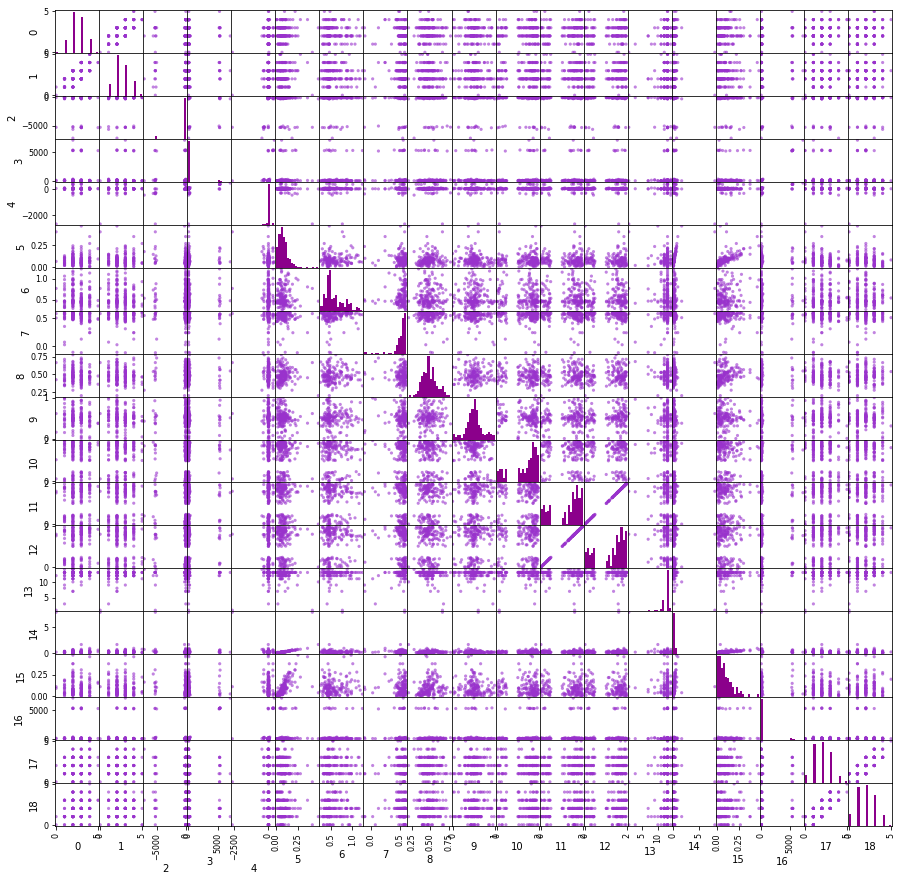

In [85]:
scatter_matrix = pd.plotting.scatter_matrix(pd.DataFrame(X), c='darkorchid', figsize=(15, 15), marker='o',hist_kwds={'bins': 20, 'color' : 'darkmagenta'}, s=10, alpha=.6)
plt.savefig(r"'scatter_matrix_p8_t1.png") 

clean_weird_data is a function that removes the lines relative to the n biggest elements of each feature (then it removes n*features lines)
Input: 
X - Feature vector
y - Output vector
n - Number of lines to me removed ( divided by the number of features)

In [86]:
#remove n biggest values of each dimension
def clean_weird_data(X,y,n):
    n = 50
    X_reduced = X.copy()
    y_reduced = y.copy()
    for _ in range(n):
        for k in range(len(y)):
            max0, max1, max2 = 0 ,0, 0
            if X_reduced[k][0] > max0:
                max0 = X_reduced[k][0]
                k0 = k
            if X_reduced[k][1] > max1:
                max1 = X_reduced[k][1]
                k1 = k
            if X_reduced[k][1] > max2:
                max2 = X_reduced[k][2]
                k2 = k        
        X_reduced = np.delete(X_reduced, (k0,k1,k2), axis = 0)
        y_reduced= np.delete(y, (k0,k1,k2)).tolist()
    return X_reduced, y_reduced

## Applying PCA

3-Dimension PCA

In [87]:
X = np.genfromtxt('./features/features_p8_p9_1.csv', delimiter=',')
y = np.genfromtxt('./features/output_p8_p9_1.csv', delimiter=',')

In [88]:
model_pca3 = PCA(n_components=3)

# On entraîne notre modèle (fit) sur les données
model_pca3.fit(X)

# On applique le résultat sur nos données :
X_reduced3 = model_pca3.transform(X)

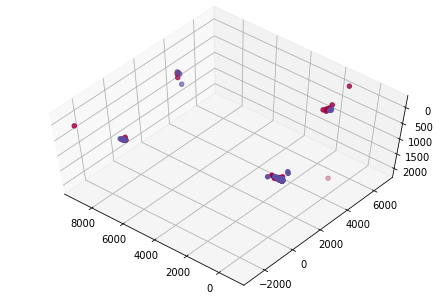

In [89]:
# Création de la figure 3D
fig = plt.figure(0)
ax = Axes3D(fig, elev=-120, azim=50)

# Affichage des valeurs
ax.scatter(X_reduced3[:, 0], X_reduced3[:, 1], X_reduced3[:, 2], c=y, cmap='Spectral')

Let's plot the 2-dimension graphs to have a better ideia on how the data looks like

Text(0, 0.5, 'Dimension 2')

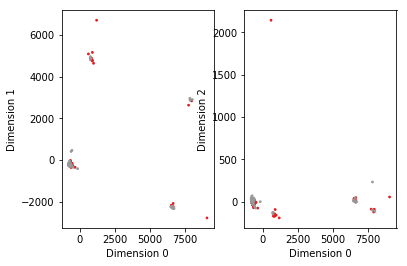

In [90]:
#plt.figure(1)
##########Real
plt.subplot(1, 2, 1)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=y, cmap='Set1', s = 3)
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')
#plt.title('Real Output')

plt.subplot(1, 2, 2)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 2], c=y, cmap='Set1', s = 3)
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 2')
#plt.title('Predicted by 2-PCA Output')

2-Dimension PCA

In [91]:
model_pca2 = PCA(n_components=2)

# On entraîne notre modèle (fit) sur les données
model_pca2.fit(X)

# On applique le résultat sur nos données :
X_reduced2 = model_pca2.transform(X)

Text(0, 0.5, 'Dimension 1')

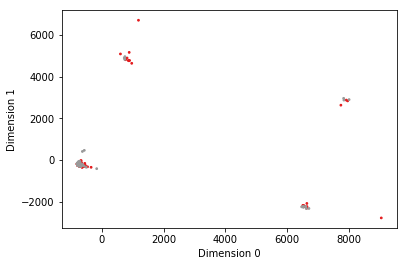

In [92]:
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y, cmap='Set1', s = 3)
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')
#plt.title('Real Output')

Applying K-Means Algorithm

For the 3d-PCA

Let's start with the data generated from 2 players (8 and 9). So n_clusters = 3

In [94]:
X = np.genfromtxt('./features/features_p8_p9_1.csv', delimiter=',')
y = np.genfromtxt('./features/output_p8_p9_1.csv', delimiter=',')

In [95]:
n_clusters = 2

In [96]:
model3=KMeans(n_clusters)
model3.fit(X_reduced3)
pred_pca3 = model3.predict(X_reduced3)

Text(0.5, 1.0, 'Predicted by 2-PCA Output')

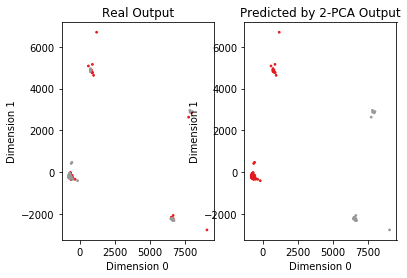

In [97]:
plt.subplot(1, 2, 1)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=y, cmap='Set1', s = 3)
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')
plt.title('Real Output')

plt.subplot(1, 2, 2)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=pred_pca3, cmap='Set1', s = 3)
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')
plt.title('Predicted by 2-PCA Output')

Text(0.5, 1.0, 'Predicted by 3-PCA Output')

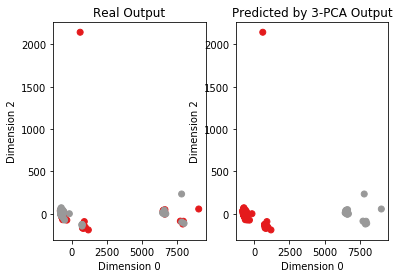

In [98]:
plt.subplot(1, 2, 1)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 2], c=y, cmap='Set1')
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 2')
plt.title('Real Output')

#plt.figure(2)
plt.subplot(1, 2, 2)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 2], c=pred_pca3, cmap='Set1')
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 2')
plt.title('Predicted by 3-PCA Output')

Let's try now for the 2d-PCA

In [99]:
model2=KMeans(n_clusters)
model2.fit(X_reduced2)
pred_pca2 = model2.predict(X_reduced2)

Text(0.5, 1.0, 'Predicted by 2-PCA Output')

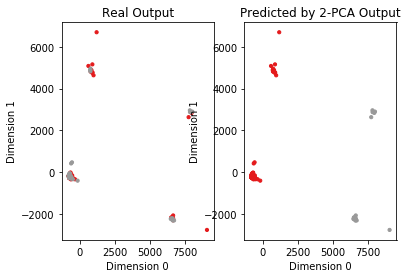

In [100]:
plt.subplot(1, 2, 1)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=y, cmap='Set1', s = 10)
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')
plt.title('Real Output')

plt.subplot(1, 2, 2)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=pred_pca2, cmap='Set1', s = 10)
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')
plt.title('Predicted by 2-PCA Output')

Not that bad!!

Let's visualize the Data from players 8 and 9